# **Projeto Computacional Final**

Aluno: Bruno Barros Xavier

Matrícula: 200015621

Aluno: Gabriel Francsico de Oliveira Castro

Matrícula: 202066571

## Objetivo

Criar uma rede neural capaz de calcular as probabilidades do eleitor pertecenete ao universo da Universidade de Brasília (UnB) ter votado no LUIZ INÁCIO LULA DA SILVA (PT), JAIR MESSIAS BOLSONARO (PL) ou Abesteve-se do voto. A abordagem para essa tarefa envolverá a implementação de uma rede neural com classificação multiclasses utilizando a função softmax e representação one-hot para os rótulos. Nesse sentido, a função softmax será responsável por atribuir probabilidades às diferentes classes possíveis.


    1) Bibliotecas ou funções utilizadas

In [60]:


import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import os
import seaborn as sns

    1.1) Leitura do Arquivo e Tratamento da Base de Dados

In [3]:
# Nome do arquivo e onde está localizado
arquivo_csv = os.path.expanduser('Base de Dados.csv')
data = pd.read_csv(arquivo_csv)
data

,Data,Pontuacao,Tipo_Coleta,Sexo,Fx_etaria,Fx_renda,Presidencia,Governo,Turno,Hora
0,2022-08-04 18:58:49 UTC,0,AAS sistemática,Feminino,19 a 24,1 a 2 SM,LUIZ INÁCIO LULA DA SILVA (PT),Não sei/não quero responder,Noturno,18:58:49
1,2022-08-04 19:00:30 UTC,0,AAS sistemática,Masculino,25 a 29,5 a 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Não sei/não quero responder,Noturno,19:00:29
2,2022-08-04 19:01:50 UTC,0,AAS sistemática,Masculino,19 a 24,5 a 10 SM,Não sei/ não quero responder,Não sei/não quero responder,Noturno,19:01:49
3,2022-08-04 19:02:40 UTC,0,AAS sistemática,Masculino,19 a 24,5 a 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Leandro Grass (PV),Noturno,19:02:39
4,2022-08-04 19:04:02 UTC,0,AAS sistemática,Masculino,19 a 24,mais de 10 SM,SIMONE TEBET (MDB),Leandro Grass (PV),Noturno,19:04:02
...,...,...,...,...,...,...,...,...,...,...
195,2022-08-01 16:06:58 UTC,0,AAS sistemática,Feminino,19 a 24,Até 1 SM,VERA LÚCIA (PSTU),Não sei/ Não quero responder,Diurno,16:06:58
196,2022-08-02 08:46:31 UTC,0,AAS sistemática,Feminino,19 a 24,5 a 10 SM,CIRO GOMES (PDT),Keka Bagno (PSOL),Diurno,08:46:31
197,2022-07-26 11:20:43 UTC,0,AAS sistemática,Feminino,19 a 24,Sem Resposta,Não sei/ Não quero responder,Não sei/ Não quero responder,Diurno,11:20:43
198,2022-08-02 09:10:19 UTC,0,AAS sistemática,Feminino,19 a 24,mais de 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Keka Bagno (PSOL),Diurno,09:10:19


Ao analisar a Base de Dados fornecida pelo Departamento de Estatística, torna-se evidente a presença de alguns dados que não se adequam de maneira apropriada à construção da rede neural, como as colunas: "Tipo_Coleta", "Pontuação" e "Data".

Além disso, identificou-se a necessidade de corrigir alguns erros presentes nos dados. Por exemplo, padronizar a opção "Não sei/não quero responder" para "Não sei/ Não quero responder", garantindo a existência de somente uma classe. Outra correção relevante refere-se ao nome do candidato a governador 'Ibaneis Rocha (MDB)' o qual foi escrito errado.

    1.2) Observações importantes para o desenvolvimento do modelo

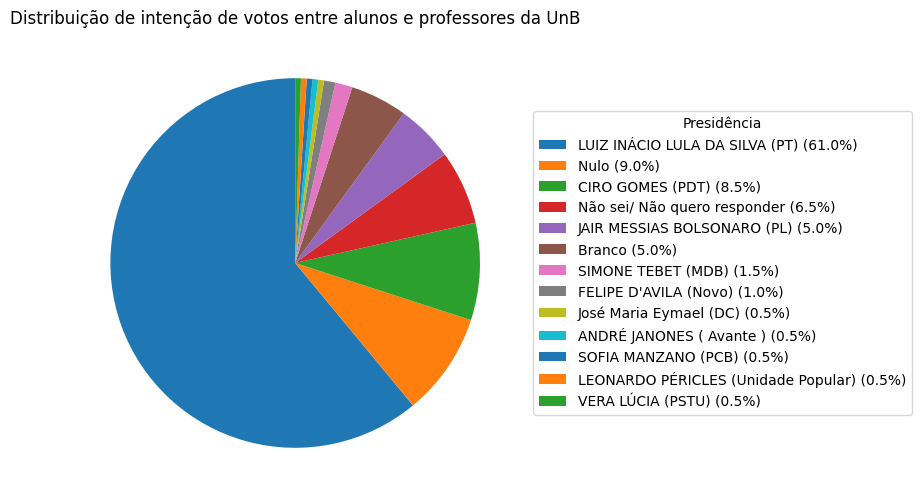

In [4]:
# Arrumando o que está escrito errado
data['Presidencia'] = data['Presidencia'].replace('Não sei/ não quero responder', 'Não sei/ Não quero responder')


distribuicao = data['Presidencia'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(distribuicao, labels=None, autopct='', startangle=90)


legenda_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(distribuicao.index, (distribuicao / distribuicao.sum()) * 100)]
plt.legend(legenda_labels, title='Presidência', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição de intenção de votos entre alunos e professores da UnB')
plt.show()

Analisando o cenário da Universidade de Brasília (UnB), é perceptível a diferença entre o ambiente universitário e a situação que ocorreu em todo o território brasileiro durante as eleições, especialmente em relação ao segundo turno no que que se refere à polarização entre os candidatos 'LUIZ INÁCIO LULA DA SILVA (PT)' e 'JAIR MESSIAS BOLSONARO (PL)'. Haja vista que no contexto das eleições nacionais, observava-se uma polarização. No entanto, na UnB, apenas 5% dos entrevistados manifestaram intenção de voto no candidato do PL, um número notavelmente baixo, até menor do que aqueles que optaram por "Não sei/ Não quero responder". 

Por outro lado, o candidato 'LUIZ INÁCIO LULA DA SILVA (PT)' obteve uma expressiva intenção de votos. Diante desses resultados, podemos concluir uma tendência UnB é um ambiente politizado. Portanto, para representar um contexto mais amplo, esse modelo não seria útil, uma vez que foi treinado com dados bastante enviesados, especialmente em relação ao a disputa pela presidência.

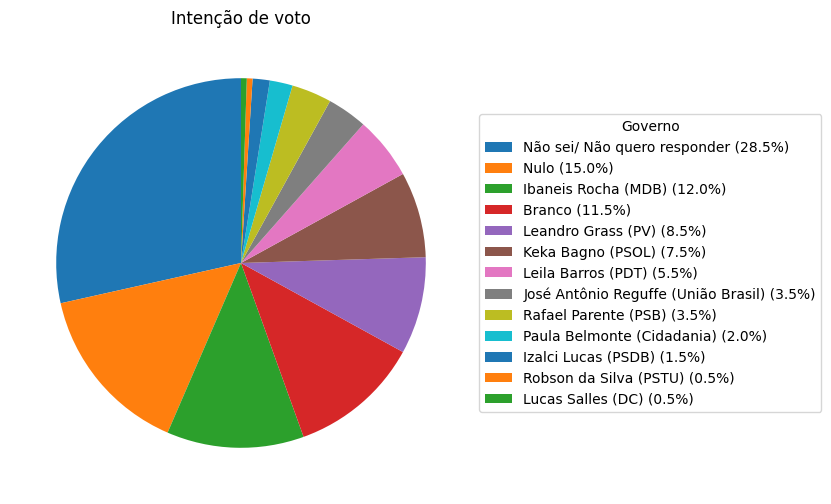

In [5]:
# Arrumando o que está escrito errado
data['Governo'] = data['Governo'].replace('Não sei/não quero responder', 'Não sei/ Não quero responder')
data['Governo'] = data['Governo'].replace('Ibanes Rocha (MDB)', 'Ibaneis Rocha (MDB)')

distribuicao = data['Governo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(distribuicao, labels=None, autopct=None, startangle=90)
legenda_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(distribuicao.index, (distribuicao / distribuicao.sum()) * 100)]

plt.legend(legenda_labels, title='Governo', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Intenção de voto')
plt.show()

No que se refere à intenção de voto para governador, notou-se um padrão semelhante ao da intenção de voto para 'Presidente', observando-se uma presença muito clara de governadores de esquerda ou pelo menos alinhados com esses ideais. Por outro lado, por alguma razão, a maioria dos eleitores optaram por opções como: 'Não sei/ Não quero responder'. 'Nulo' e 'Branco'. Sendo algo totalmente inesperado que dificulta muito na criação do nosso modelo.

Outro ponto a ser salientado, nota-se uma grande variedade de classes, como as 13 opções para governador, então iremos juntar todas essas classes para facilitar a atuação do modelo de classificação.

    1.3) Diminuíção des categorias e simulando uma situação entre apenas dois candidatos na disputa pelo segundo turno, da mesma forma que ocorreu as eleições de 2022

Em relação à categoria de governadores, visando reduzir o número de opções e simplificar para o modelo, agrupamos todas as possíveis escolhas em: 'Esquerda', 'Centro-Esquerda', 'Direita', 'Centro-Direita' e 'Abstenção'. Para determinar a qual classe um candidato pertence, observamos suas afinidades ideológicas e o tipo de partido ao qual estão vinculados, reconhecendo que essa análise é subjetiva e muito fluída.

No que diz respeito aos presidentes, pressupomos que todos os eleitores que votaram em um determinado partido ou candidato seguiriam a mesma linha do candidato ou partido. Por exemplo, a candidata 'SIMONE TEBET (MDB)' declarou apoio ao candidato 'LUIZ INÁCIO LULA DA SILVA (PT)', então presumimos que todos que votaram na candidata Simone votariam no candidato Lula. Essa mesma abordagem foi aplicada aos partidos; por exemplo, o partido PCB declarou apoio ao candidato Lula, então supusemos que todos os seus eleitores seguiriam o mesmo caminho.

Por outro lado, introduzimos a coluna 'Período', na qual dividimos em Manhã (0h às 12h), Tarde (12h às 17h) e Noite (17h às 23h), preenchendo-as de acordo com o momento do dia em que os eleitores foram entrevistados. Além disso, nesse ponto, eliminamos as colunas que não seriam relevantes para o treinamento do modelo.

In [6]:

# Mapeamento de governadores
governador_mapping = {
    'Leandro Grass (PV)': 'Esquerda',
    'Ibaneis Rocha (MDB)': 'Centro-Direita',
    'Ibanes Rocha (MDB)': 'Centro-Direita',
    'José Antônio Reguffe (União Brasil)': 'Centro-Direita',
    'Leila Barros (PDT)': 'Centro-Esquerda',
    'Rafael Parente (PSB)': 'Centro-Esquerda',
    'Paula Belmonte (Cidadania)': 'Esquerda',
    'Robson da Silva (PSTU)': 'Esquerda',
    'Lucas Salles (DC)': 'Direita',
    'Keka Bagno (PSOL)': 'Esquerda',
    'Izalci Lucas (PSDB)': 'Centro-Direita',
    'Não sei/não quero responder': 'Abstenção',
    'Não sei/ Não quero responder': 'Abstenção',
    'Branco' : 'Abstenção',
    'Nulo' : 'Abstenção'
}

# Mapeamento de presidentes
presidente_mapping = {
    'SIMONE TEBET (MDB)': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    'CIRO GOMES (PDT)': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    'José Maria Eymael (DC)': 'JAIR MESSIAS BOLSONARO (PL)',
    'ANDRÉ JANONES ( Avante )': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    "FELIPE D'AVILA (Novo)": 'JAIR MESSIAS BOLSONARO (PL)',
    'SOFIA MANZANO (PCB)': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    'LEONARDO PÉRICLES (Unidade Popular)': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    'VERA LÚCIA (PSTU)': 'LUIZ INÁCIO LULA DA SILVA (PT)',
    'Não sei/ não quero responder': 'Abstenção',
    'Não sei/ Não quero responder': 'Abstenção',
    'Branco' : 'Abstenção',
    'Nulo' : 'Abstenção'
}

# Substituir no DataFrame
data['Governo'] = data['Governo'].replace(governador_mapping)
data['Presidencia'] = data['Presidencia'].replace(presidente_mapping)

data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M:%S').dt.hour

data['Periodo'] = pd.cut(data['Hora'], bins=[0, 12, 17, 23], labels=['Manhã', 'Tarde', 'Noite'], include_lowest=True)

colunas_para_apagar = ['Data', 'Pontuacao', 'Tipo_Coleta', 'Pontuacao', 'Hora']
data = data.drop(colunas_para_apagar, axis=1, errors='ignore')

data


,Sexo,Fx_etaria,Fx_renda,Presidencia,Governo,Turno,Periodo
0,Feminino,19 a 24,1 a 2 SM,LUIZ INÁCIO LULA DA SILVA (PT),Abstenção,Noturno,Noite
1,Masculino,25 a 29,5 a 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Abstenção,Noturno,Noite
2,Masculino,19 a 24,5 a 10 SM,Abstenção,Abstenção,Noturno,Noite
3,Masculino,19 a 24,5 a 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Esquerda,Noturno,Noite
4,Masculino,19 a 24,mais de 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Esquerda,Noturno,Noite
...,...,...,...,...,...,...,...
195,Feminino,19 a 24,Até 1 SM,LUIZ INÁCIO LULA DA SILVA (PT),Abstenção,Diurno,Tarde
196,Feminino,19 a 24,5 a 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Esquerda,Diurno,Manhã
197,Feminino,19 a 24,Sem Resposta,Abstenção,Abstenção,Diurno,Manhã
198,Feminino,19 a 24,mais de 10 SM,LUIZ INÁCIO LULA DA SILVA (PT),Esquerda,Diurno,Manhã


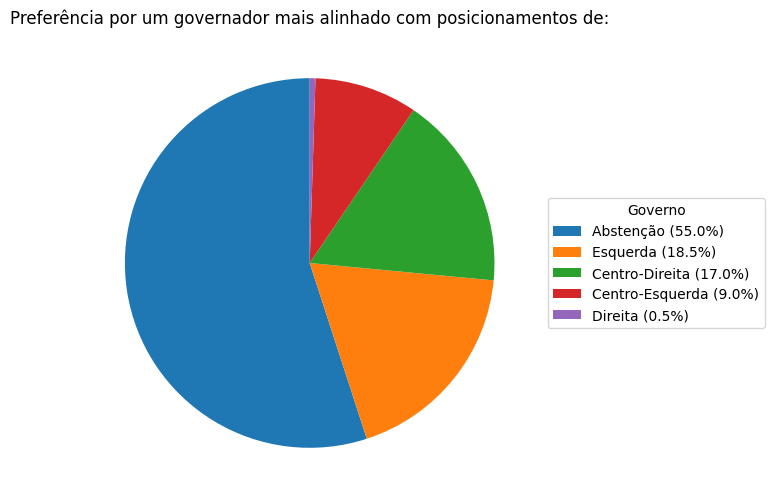

In [7]:
distribuicao = data['Governo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(distribuicao, labels=None, autopct=None, startangle=90)
legenda_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(distribuicao.index, (distribuicao / distribuicao.sum()) * 100)]

plt.legend(legenda_labels, title='Governo', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Preferência por um governador mais alinhado com posicionamentos de:')
plt.show()


Agora de maneira mais clara, podemos observar, por meio deste gráfico, que a maioria dos eleitores optou por abster-se de votar por algum motivo desconhecido. Além disso, nota-se que a maior parte dos eleitores que manifestaram intenção de voto está mais alinhada a governadores com posicionamentos de Esquerda ou Centro-Esquerda, contribuíndo mais uma vez com a ideia de que UnB é um ambiente politizado.

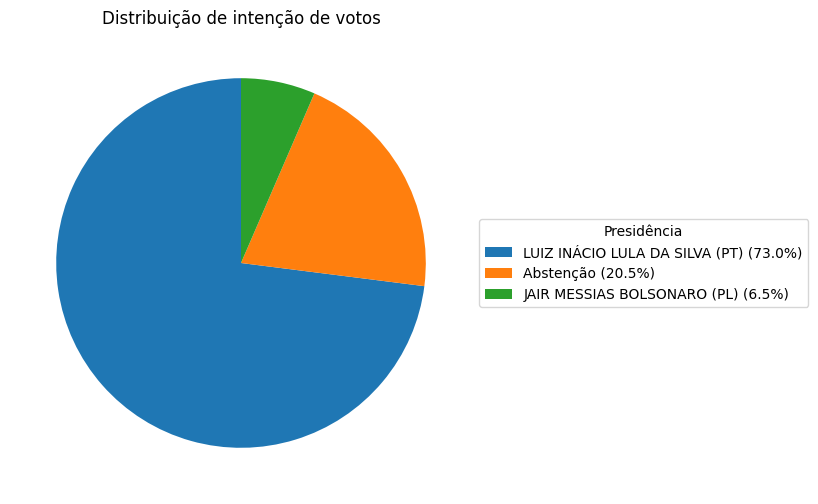

In [8]:
distribuicao = data['Presidencia'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(distribuicao, labels=None, autopct='', startangle=90)

legenda_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(distribuicao.index, (distribuicao / distribuicao.sum()) * 100)]
plt.legend(legenda_labels, title='Presidência', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição de intenção de votos')
plt.show()

Em relação a distribuíção de votos para presidentes, podemos notar que a maioria dos eleitores do Universo da UnB tinha a intenção de votar no candidato Lula, o que não é uma surpresa considerando o ambiente da faculdade, bem como o gráfico de distribuíção de votos antes dos dados serem tratados. No entanto, o número significativo de eleitores que se abstiveram do voto levanta uma questão intrigante: será que esses eleitores realmente abstiveram-se ou optaram por não responder devido a algum receio?

    1.4) Mapeando as variáveis e definindo entrada e saída

In [9]:
# Substituindo LUIZ INÁCIO LULA DA SILVA (PT) e JAIR MESSIAS BOLSONARO (PL)
mapping_Presidencia = {'Abstenção': 0.0, 'LUIZ INÁCIO LULA DA SILVA (PT)': 1.0, 'JAIR MESSIAS BOLSONARO (PL)': 2.0, }
data['Presidencia'] = data['Presidencia'].replace(mapping_Presidencia)

# Substituindo Faixa Etária
mapping_Fx_etaria = {'Sem Resposta': 0.0,'19 a 24': 1.0, '25 a 29': 2.0, '30 a 34': 3.0, '35 a 39': 4.0, 'acima de 44': 5.0, 'Até 18': 6.0, '40 a 44': 7.0}
data['Fx_etaria'] = data['Fx_etaria'].replace(mapping_Fx_etaria)

# Substituindo Sexo
mapping_Sexo = {'Feminino': 0.0, 'Masculino': 1.0}
data['Sexo'] = data['Sexo'].replace(mapping_Sexo)

# Substituindo Turno
mapping_Turno = {'Noturno': 0.0, 'Diurno': 1.0}
data['Turno'] = data['Turno'].replace(mapping_Turno)

# Substituindo Período
mapping_Periodo = {'Manhã': 0.0, 'Tarde': 1.0, 'Noite': 2.0}
data['Periodo'] = data['Periodo'].replace(mapping_Periodo)

# Substituindo Faixa de Renda
mapping_Fx_renda = {'Sem Resposta': 0.0,'1 a 2 SM': 1.0, '5 a 10 SM': 2.0, 'mais de 10 SM': 3.0, '2 a 5 SM': 4.0, 'Até 1 SM': 5.0}
data['Fx_renda'] = data['Fx_renda'].replace(mapping_Fx_renda)

# Substituindo Governo
mapping_Governo = {'Abstenção': 0.0,'Esquerda': 1.0, 'Centro-Esquerda': 2.0, 'Direita': 3.0, 'Centro-Direita': 4.0}
data['Governo'] = data['Governo'].replace(mapping_Governo)


data

,Sexo,Fx_etaria,Fx_renda,Presidencia,Governo,Turno,Periodo
0,0.0,1.0,1.0,1.0,0.0,0.0,2.0
1,1.0,2.0,2.0,1.0,0.0,0.0,2.0
2,1.0,1.0,2.0,0.0,0.0,0.0,2.0
3,1.0,1.0,2.0,1.0,1.0,0.0,2.0
4,1.0,1.0,3.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
195,0.0,1.0,5.0,1.0,0.0,1.0,1.0
196,0.0,1.0,2.0,1.0,1.0,1.0,0.0
197,0.0,1.0,0.0,0.0,0.0,1.0,0.0
198,0.0,1.0,3.0,1.0,1.0,1.0,0.0


In [10]:
X = data.drop(columns=['Presidencia'])  # Variáveis de entrada
y = data['Presidencia']                 # Variáveis de saida

X

,Sexo,Fx_etaria,Fx_renda,Governo,Turno,Periodo
0,0.0,1.0,1.0,0.0,0.0,2.0
1,1.0,2.0,2.0,0.0,0.0,2.0
2,1.0,1.0,2.0,0.0,0.0,2.0
3,1.0,1.0,2.0,1.0,0.0,2.0
4,1.0,1.0,3.0,1.0,0.0,2.0
...,...,...,...,...,...,...
195,0.0,1.0,5.0,0.0,1.0,1.0
196,0.0,1.0,2.0,1.0,1.0,0.0
197,0.0,1.0,0.0,0.0,1.0,0.0
198,0.0,1.0,3.0,1.0,1.0,0.0


    1.5) Treinando o modelo e testando

In [11]:
# Transformando em one-hot
y_categorical = tf.keras.utils.to_categorical(y)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),  # Camada de entrada
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(3, activation='softmax', kernel_initializer=tf.initializers.RandomNormal(stddev=0.01))  # Camada de saída com ativação softmax
])

# Gradiente Descendente Estocástico (SGD) e Categorical Crossentropy para classificação multiclasse
opt = tf.keras.optimizers.SGD(clipnorm=1.) 
fn = tf.keras.losses.CategoricalCrossentropy()

# Compilar o modelo
model.compile(loss=fn, optimizer=opt, metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X, y_categorical, epochs= 20000, batch_size=64, validation_split=0.15)

Epoch 1/20000
3/3 [==============================] - 0s 90ms/step - loss: 1.1049 - accuracy: 0.3412 - val_loss: 1.0675 - val_accuracy: 0.6667
Epoch 2/20000
3/3 [==============================] - 0s 14ms/step - loss: 1.0368 - accuracy: 0.7412 - val_loss: 1.0208 - val_accuracy: 0.6667
Epoch 3/20000
3/3 [==============================] - 0s 13ms/step - loss: 0.9768 - accuracy: 0.7412 - val_loss: 0.9809 - val_accuracy: 0.6667
Epoch 4/20000
3/3 [==============================] - 0s 13ms/step - loss: 0.9315 - accuracy: 0.7412 - val_loss: 0.9508 - val_accuracy: 0.6667
Epoch 5/20000
3/3 [==============================] - 0s 14ms/step - loss: 0.8922 - accuracy: 0.7412 - val_loss: 0.9273 - val_accuracy: 0.6667
Epoch 6/20000
3/3 [==============================] - 0s 13ms/step - loss: 0.8585 - accuracy: 0.7412 - val_loss: 0.9095 - val_accuracy: 0.6667
Epoch 7/20000
3/3 [==============================] - 0s 13ms/step - loss: 0.8323 - accuracy: 0.7412 - val_loss: 0.8969 - val_accuracy: 0.6667
Epoch 

Nesse ponto, é interessante observar que devido ao reduzido número de dados, aproximadamente 200, optamos por configurar um número considerável de épocas com o objetivo de aprimorar a precisão do modelo desenvolvido e garantir que ele realmente aprendesse.

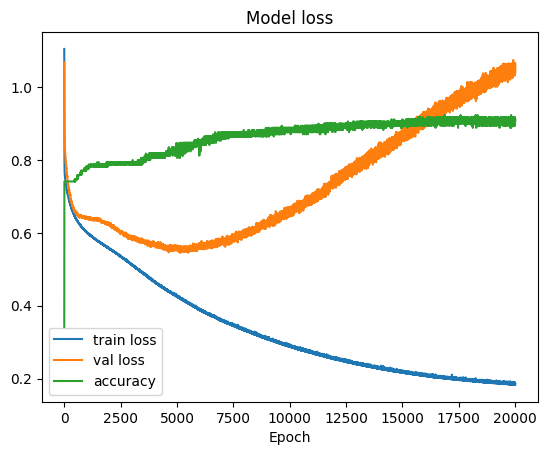

1/1 [==============================] - 0s 15ms/step - loss: 0.2021 - accuracy: 0.9333
Avaliando o modelo com os dados de teste obtemos uma acurácia de 93.33%


In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'val loss', 'accuracy'])
plt.show()


# Dividindo variaveis de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Convertendo rótulos para one-hot encoding
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Avaliar o modelo com os dados de teste
_, test_accuracy = model.evaluate(X_test, y_test_categorical) # Avalia somente a acurácia
print(f'Avaliando o modelo com os dados de teste obtemos uma acurácia de {test_accuracy*100:.2f}%')


Obtivemos uma acurácia extremamente satisfatória. No entanto, é importante ressaltar que quando o número de épocas é menor, como por exemplo, com 200 épocas, ocorre um fenômeno interessante. A acurácia do modelo permanece alta, por volta de 80%, mas há uma incerteza sobre se o modelo realmente aprendeu ou apenas identificou que ao admitir que a maioria das entradas fosse 'Lula', teria uma acurácia alta, uma vez que a maioria dos eleitores declarou intenção de voto no candidato do PT. Com isso em mente, optamos por aumentar drasticamente o número de épocas para garantir que o modelo tenha, de fato, aprendido, e obtivemos resultados bem satisfatórios.


    1.6) Avaliação e conclusões

In [15]:
# Fazer previsões com o modelo treinado
predictions = model.predict(X_test)
probabilidades = (predictions).round(2) 


print(probabilidades)

1/1 [==============================] - 0s 53ms/step
[[0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.13 0.87 0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.05 0.93 0.01]
 [0.93 0.07 0.  ]
 [0.   0.99 0.01]
 [0.   1.   0.  ]
 [0.9  0.1  0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.01]
 [0.6  0.4  0.  ]
 [0.06 0.94 0.  ]
 [0.53 0.47 0.  ]
 [0.95 0.05 0.  ]
 [1.   0.   0.  ]
 [0.85 0.15 0.  ]
 [0.09 0.91 0.  ]
 [0.06 0.94 0.  ]
 [0.95 0.02 0.03]
 [0.02 0.97 0.02]
 [0.85 0.14 0.  ]
 [0.07 0.93 0.  ]
 [0.05 0.95 0.  ]
 [0.05 0.03 0.92]
 [0.04 0.02 0.94]
 [0.52 0.48 0.  ]
 [0.36 0.62 0.02]]


In [18]:
print(y_test)

58     1.0
86     1.0
87     1.0
113    1.0
162    1.0
33     1.0
5      1.0
34     0.0
115    1.0
22     1.0
83     0.0
3      1.0
124    1.0
67     0.0
133    1.0
111    1.0
173    0.0
46     0.0
49     0.0
69     1.0
122    1.0
30     0.0
109    1.0
182    0.0
161    1.0
73     1.0
50     2.0
36     2.0
19     1.0
27     1.0
Name: Presidencia, dtype: float64


Percebe-se como a probabilidade do eleitor votar em determinado candidato realmente reflete a realidade. Abaixo, apresentaremos de maneira mais clara três exemplos extremos no que se refere a classificação de 3 classes (Lula, Bolsonaro e Abstenção) nos quais a probabilidade apresentada está bem interessante.

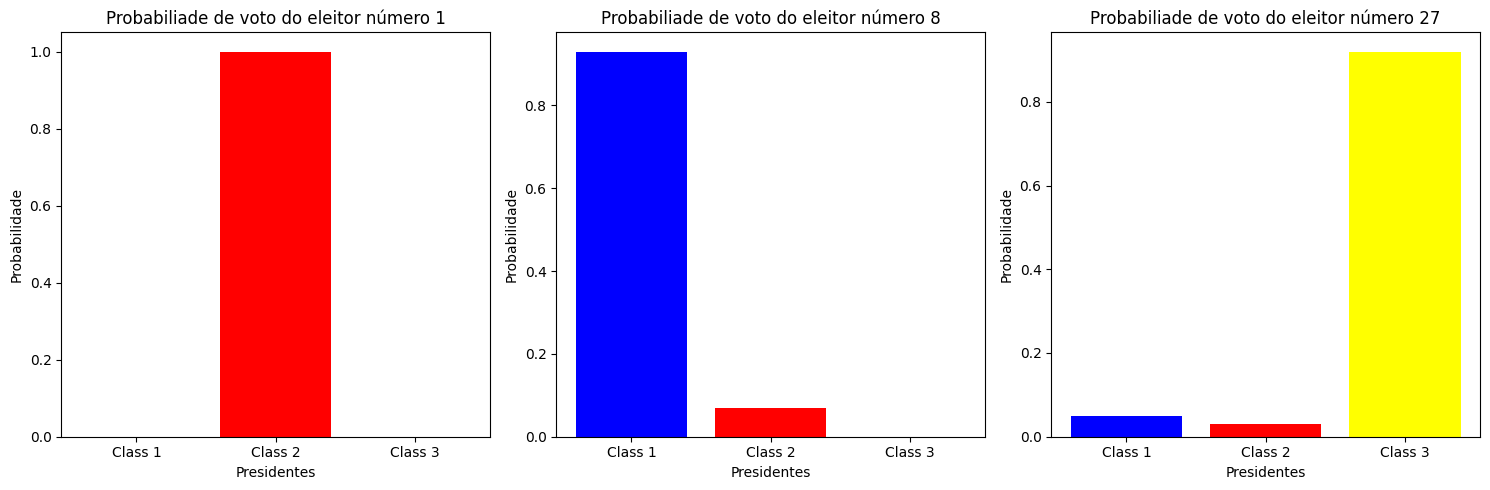

In [39]:
# Eleitores escolhidos
eleitores_escolhidos = [0, 7, 26]

# Configurações do subplot
num_eleitores = len(eleitores_escolhidos)
fig, axs = plt.subplots(1, num_eleitores, figsize=(15, 5))

# Iteração sobre os eleitores escolhidos
for idx, eleitor_numero in enumerate(eleitores_escolhidos):
    # Obtenha as probabilidades para o eleitor escolhido
    probs = probabilidades[eleitor_numero]

    # Rótulos para cada classe
    labels = [f'Class {i+1}' for i in range(len(probs))]

    # Cores para cada classe
    cores = ['blue', 'red', 'yellow']

    # Crie um gráfico de barras com cores personalizadas no subplot correspondente
    axs[idx].bar(np.arange(len(labels)), probs, color=cores, tick_label=labels)

    # Adicione rótulos e título
    axs[idx].set_xlabel('Presidentes')
    axs[idx].set_ylabel('Probabilidade')
    axs[idx].set_title(f'Probabiliade de voto do eleitor número {eleitor_numero + 1}')

# Ajuste de layout
plt.tight_layout()

# Exibição da imagem com os gráficos lado a lado
plt.show()


Estes três eleitores exibem maiores probabilidades de votar em Lula, Abstenção e Bolsonaro, respectivamente. Ao analisarmos quem eles declararam efetivamente como intenção de voto, notamos que as probabilidades se alinham perfeitamente com a escolha do respectivo eleitor. Isso confirma de maneira robusta que o modelo, de fato, aprendeu a partir dos dados disponíveis. 

Em síntese, os resultados obtidos revelam-se altamente satisfatórios, evidenciando uma correspondência significativa entre as probabilidades previstas pelo modelo e as escolhas efetivas dos eleitores. Esses resultados reforçam a eficácia da aplicação da rede neural na compreensão e previsão das preferências eleitorais, especialmente no contexto peculiar da Universidade de Brasília (UnB). A precisão do modelo ao capturar as nuances das preferências eleitorais na comunidade acadêmica sugere sua utilidade como ferramenta analítica.